In [3]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 146 (delta 24), reused 35 (delta 11), pack-reused 89
Receiving objects: 100% (146/146), 14.48 MiB | 33.39 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/content/SRU-deeplearning-workshop


**Hoda Dataset**  
This collection was prepared during a master's project on the recognition of handwritten forms. The data of this collection has been extracted from about 12,000 registration forms for the national master's exam in 2014 and the continuous associate's exam of the University of Applied Sciences in 2014.  
https://www.sciencedirect.com/science/article/pii/S0167865507000037  

Here we have the matlab files.  


In [4]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

In [5]:
#load dataset > io helps us to import or export numpy array into 
#matlab file or vice versa
#.mat > matlab file export type

dataset = io.loadmat('./dataset/Data_hoda_full.mat')
print(type(dataset))

<class 'dict'>


In [6]:
print(dataset.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])


In [8]:
print(len(dataset['Data']), len(dataset['labels']))

60000 60000


In [12]:
print(type(dataset['Data']))
print(dataset['Data'].shape)

print(dataset['Data'][0])

<class 'numpy.ndarray'>
(60000, 1)
[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0, 255, 255,   0],
        [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0, 255, 255, 255, 255],
        [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0, 255, 255, 255, 255,   0],
        [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 255, 255, 255, 255, 255,   0],
        [255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         255, 255, 255, 255, 255,   0,   0],
        [255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
         255, 255, 255, 255,   0,   0,   0],
        [255,

In [14]:
# as you see we have an unwanted array 1 > so we use squeeze to 
# delete the 1 dimension
print(np.squeeze(dataset['Data']).shape)

# each picture is 27*28
print(np.squeeze(dataset['Data'])[0].shape)

(60000,)
(27, 20)


In [29]:
#test and training set > 1000 train + 200 test
X_train_original = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

"squeeze": Remove single-dimensional entries from the shape of an array.

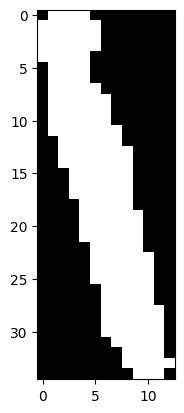

In [30]:
plt.imshow(X_train_orginal[999], cmap='gray')
plt.show()

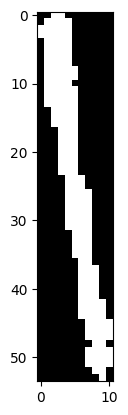

Label 100th image is: 1


In [32]:
i=100
image = X_train_original[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label {}th image is: {}".format(i, label))

## Change image size

for giving pictures to the model > we need the data driven approach  
end to end  
pixel as a feature  
FOR THIS we must have unique height and width pictures  
1. resize to constant value
2. reshape (linear pixels)

In [46]:
print(X_train_original.shape)
print(X_train_original[0].shape) #1000, > one array with 27*20 inside
print(X_train_original[2].shape)
print(X_train_original[3].shape)

# because of its differences it can't be numpy array it is array

(1000,)
(27, 20)
(10, 15)
(36, 17)


(27, 20)
(20, 20)


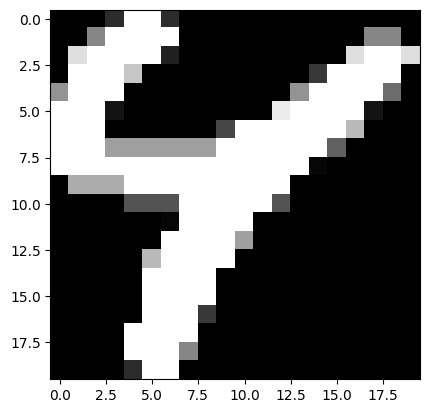

In [50]:
print(X_train_original[0].shape)

#from skimage.transform import resize
print(resize(X_train_original[0], (20,20)).shape)

x_new0 = resize(X_train_original[0], (20,20))
plt.imshow(x_new0, cmap="gray")

(10, 10)
0


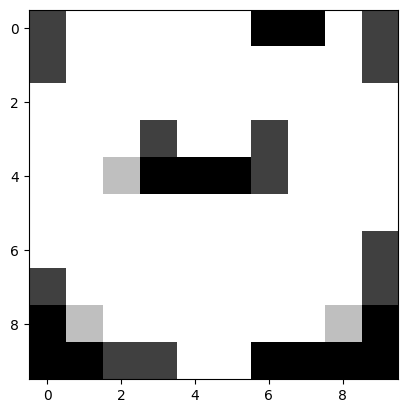

In [54]:
print(resize(X_train_original[2], (10,10)).shape)

x_new0 = resize(X_train_original[2], (10,10))
print(y_train[2])
plt.imshow(x_new0, cmap="gray")

# for each resize shape > we lost some datas

In [56]:
#resize
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_original]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test_original]

print(type(X_train_5by5))

<class 'list'>


In [58]:
X_train_5by5[:2]

[array([[5.53273485e-01, 4.90714915e-01, 2.12967539e-02, 1.53506264e-01,
         4.85460154e-01],
        [7.95628665e-01, 2.66307762e-01, 4.12513896e-01, 7.23550849e-01,
         3.21985241e-01],
        [3.88111988e-01, 6.61784149e-01, 8.66087137e-01, 2.73709192e-01,
         1.18390786e-02],
        [2.57814033e-02, 6.27421296e-01, 4.22119545e-01, 1.25845016e-02,
         1.98249201e-05],
        [7.08787669e-02, 6.95308306e-01, 1.01690057e-01, 1.63129808e-04,
         3.75737778e-10]]),
 array([[0.00216765, 0.14297813, 0.80955152, 0.29877182, 0.00394131],
        [0.09872244, 0.68747429, 0.55874243, 0.65158203, 0.09860989],
        [0.60898775, 0.42737423, 0.05995279, 0.39138726, 0.60861524],
        [0.76834423, 0.11777447, 0.61986874, 0.40749432, 0.86172856],
        [0.29828601, 0.57312954, 0.83312508, 0.66800999, 0.61605346]])]

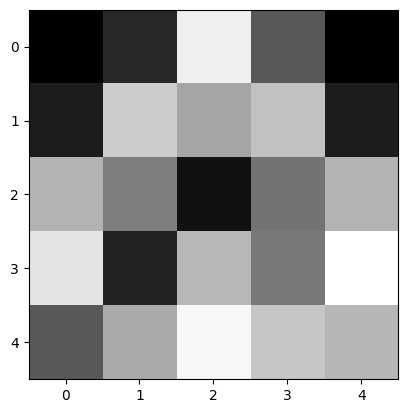

In [57]:
image = X_train_5by5[1]
plt.imshow(image, cmap='gray')
plt.show()

In [59]:
#reshape > make it linear
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

In [60]:
X_train[0].shape

(25,)